In [ ]:

import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('winequality-red.csv', sep=',')

X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Componentes: {pca.n_components_}")

Número de componentes después de PCA: 9


In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel):
    svm = SVC(kernel=kernel, random_state=42, class_weight='balanced')

    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)

    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

print("Con PCA:")
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'linear')
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'poly')
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'rbf')

print("Sin PCA:")
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'linear')
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'poly')
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'rbf')

Resultados con PCA:
Kernel: linear
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       273
           1       0.42      0.87      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.83      0.72       320
weighted avg       0.89      0.80      0.83       320

Accuracy: 0.803125

Kernel: poly
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy: 0.853125

Kernel: rbf
              precision    recall  f1-score   support

           0       0.99      0.82      0.89       273
           1       0.47      0.94      0.62        47

    accuracy                           0.83       320
   macro avg       0.73     

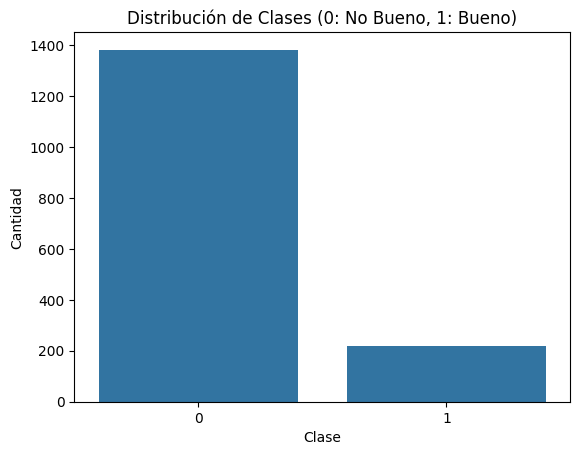

Resultados con PCA:
Kernel: linear
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       273
           1       0.42      0.87      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.83      0.72       320
weighted avg       0.89      0.80      0.83       320

Accuracy: 0.803125



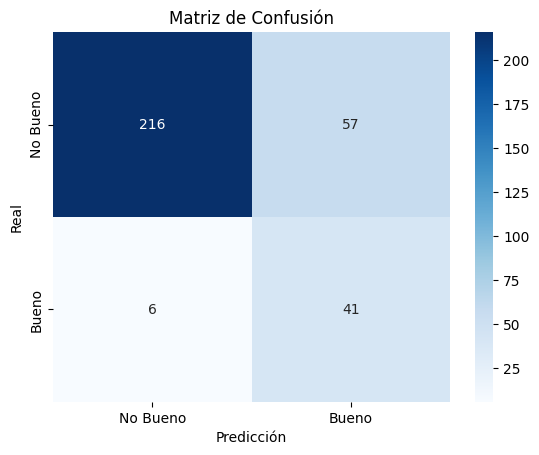

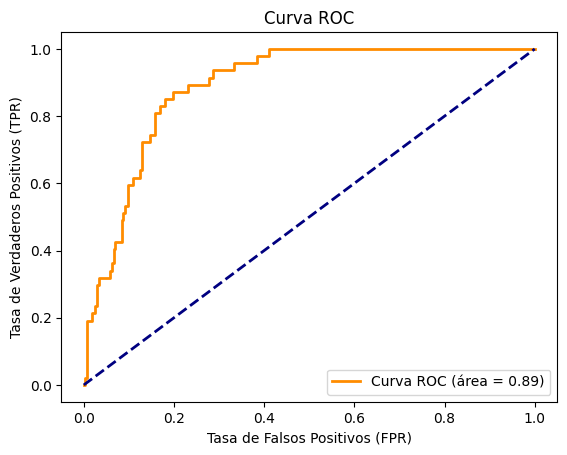

Kernel: poly
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy: 0.853125



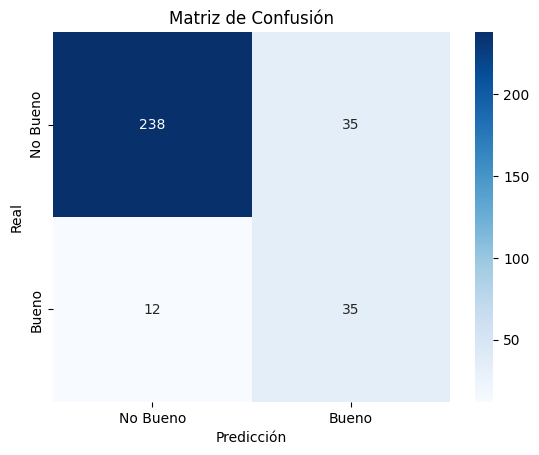

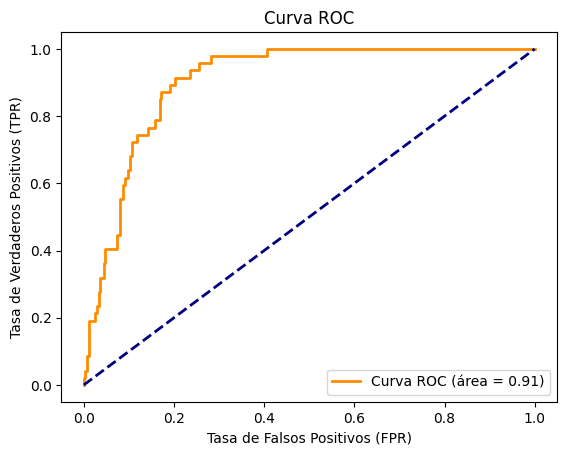

Kernel: rbf
              precision    recall  f1-score   support

           0       0.99      0.82      0.89       273
           1       0.47      0.94      0.62        47

    accuracy                           0.83       320
   macro avg       0.73      0.88      0.76       320
weighted avg       0.91      0.83      0.85       320

Accuracy: 0.834375



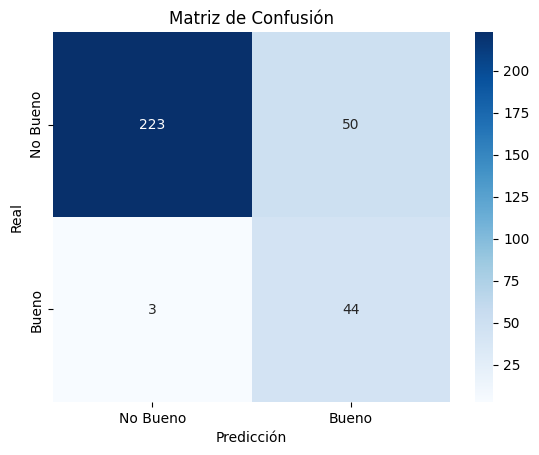

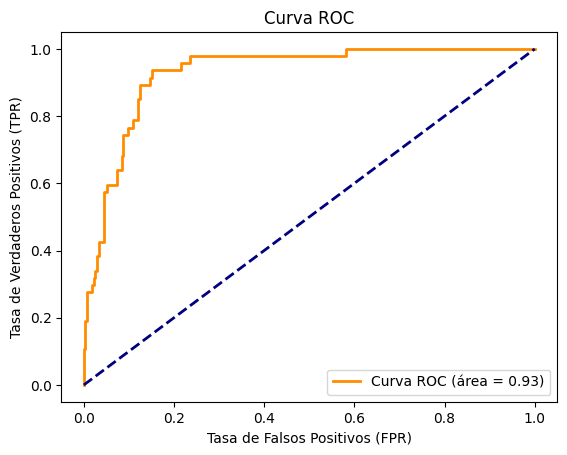

Resultados sin PCA:
Kernel: linear
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320

Accuracy: 0.803125



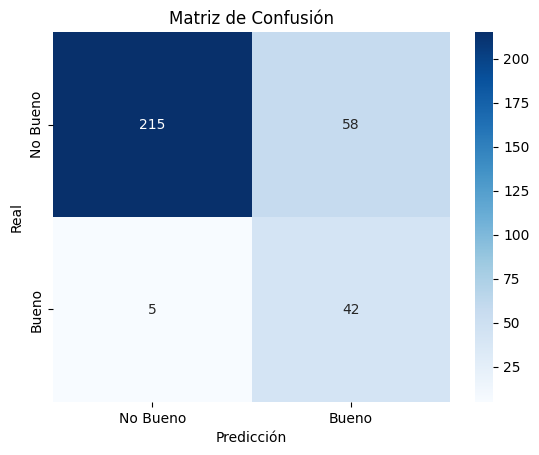

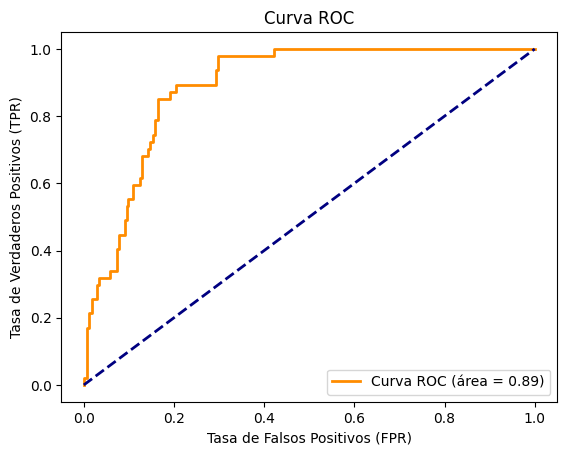

Kernel: poly
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       273
           1       0.50      0.77      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.82      0.76       320
weighted avg       0.89      0.85      0.87       320

Accuracy: 0.853125



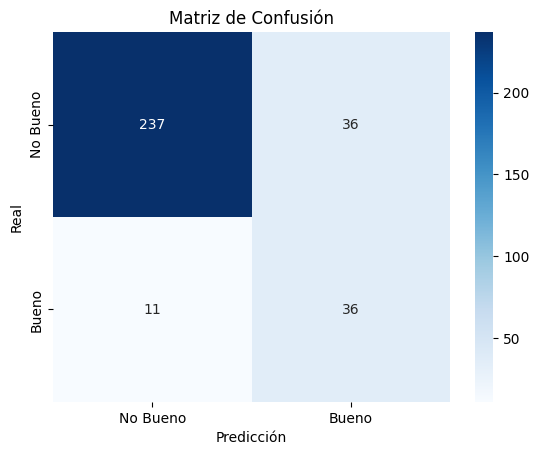

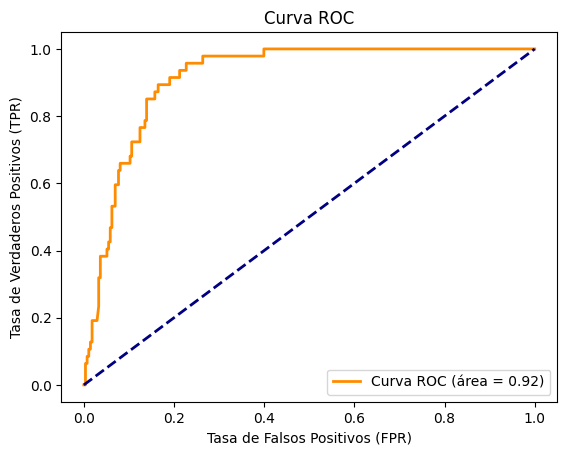

Kernel: rbf
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       273
           1       0.48      0.94      0.63        47

    accuracy                           0.84       320
   macro avg       0.73      0.88      0.77       320
weighted avg       0.91      0.84      0.86       320

Accuracy: 0.840625



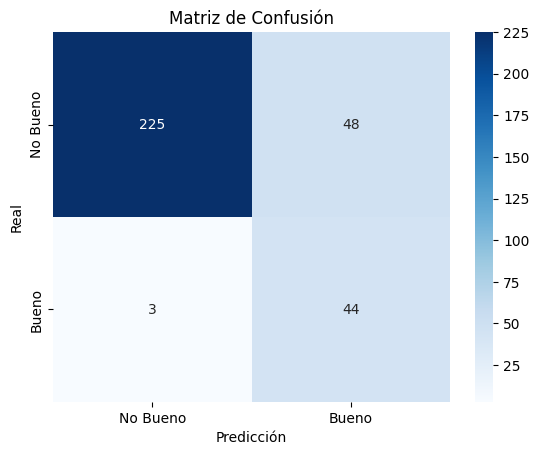

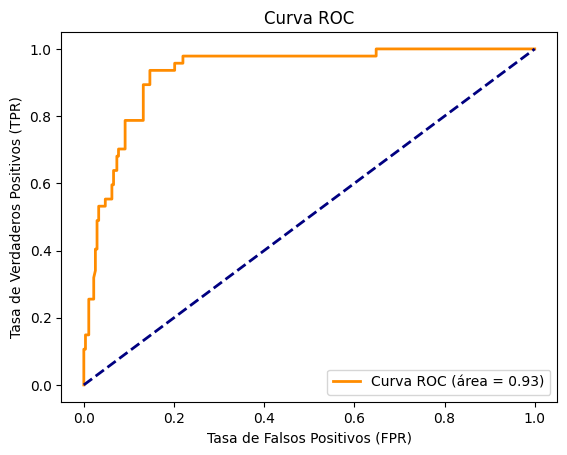

In [ ]:

def plot_class_distribution(y):
    sns.countplot(x=y)
    plt.title("Distribución de Clases (0: No Bueno, 1: Bueno)")
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bueno', 'Bueno'], yticklabels=['No Bueno', 'Bueno'])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel):
    svm = SVC(kernel=kernel, random_state=42, class_weight='balanced', probability=True)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    y_pred_prob = svm.predict_proba(X_test)[:, 1]
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    
    plot_confusion_matrix(y_test, y_pred)
    
    plot_roc_curve(y_test, y_pred_prob)

plot_class_distribution(y)

print("Con PCA:")
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'linear')
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'poly')
train_and_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, 'rbf')

print("Sin PCA:")
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'linear')
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'poly')
train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, 'rbf')

Mejores hiperparámetros encontrados:
{'C': np.float64(45.706998421703595), 'degree': 3, 'gamma': np.float64(0.6193860093330873), 'kernel': 'rbf'}

Métricas de evaluación con los mejores hiperparámetros:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.67      0.60      0.63        47

    accuracy                           0.90       320
   macro avg       0.80      0.77      0.78       320
weighted avg       0.89      0.90      0.89       320

Accuracy: 0.896875


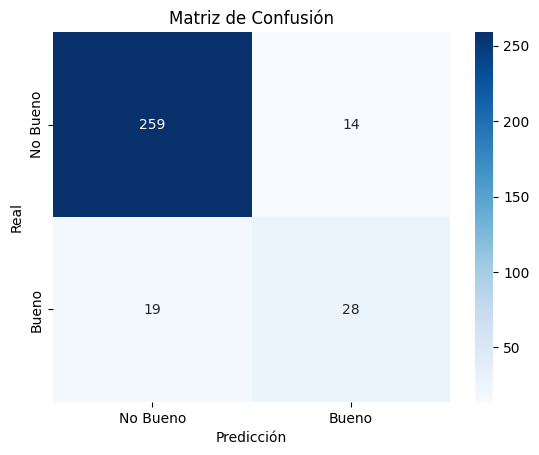

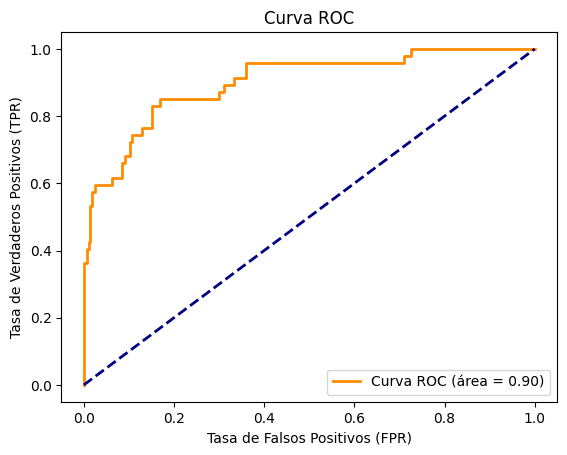

In [6]:
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.001, 1),
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': randint(1, 5)
}

svm = SVC(class_weight='balanced', probability=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
y_pred_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

print("\nMétricas de evaluación con los mejores hiperparámetros:")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

plot_confusion_matrix(y_test, y_pred)

plot_roc_curve(y_test, y_pred_prob)